In [0]:
from keras.models import Sequential
from keras.layers import Dense ,  Dropout, LSTM, CuDNNLSTM
import keras.datasets.mnist as mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Normalize X

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

Creating a Model

In [0]:
# LSTM : Recurring Neural NetWork(- Cpu -)
model = Sequential()

model.add(LSTM(128, input_shape = (X_train.shape[1:]) , activation='relu', return_sequences=True))
model.add(Dropout(0.2)) 

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1)) 

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2)) 

model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 28, 128)           80384     
_________________________________________________________________
dropout_19 (Dropout)         (None, 28, 128)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)              

In [0]:
opt = Adam(lr=0.001, decay=1e-6)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)


In [0]:
m = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 226s 4ms/step - loss: 0.0615 - acc: 0.9840 - val_loss: 0.0417 - val_acc: 0.9880
Epoch 2/5
60000/60000 [==============================] - 226s 4ms/step - loss: 0.0533 - acc: 0.9858 - val_loss: 0.1109 - val_acc: 0.9799
Epoch 3/5
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0634 - acc: 0.9832 - val_loss: 0.0492 - val_acc: 0.9858
Epoch 4/5
60000/60000 [==============================] - 227s 4ms/step - loss: 0.0421 - acc: 0.9879 - val_loss: 0.0425 - val_acc: 0.9872
Epoch 5/5
60000/60000 [==============================] - 231s 4ms/step - loss: 0.0381 - acc: 0.9894 - val_loss: 0.0510 - val_acc: 0.9889


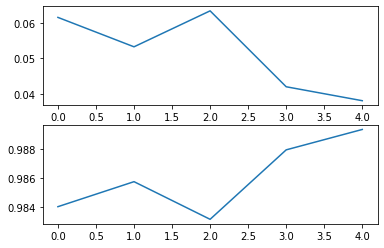

In [0]:

f, (a,b) = plt.subplots(2,1)
a.plot(m.history['loss'])
b.plot(m.history['acc'])


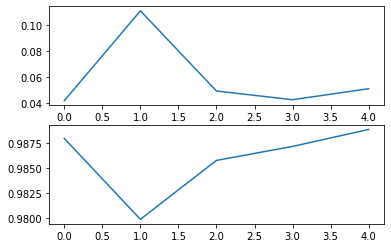

In [0]:
f1, (a1,b1) = plt.subplots(2,1)
a1.plot(m.history['val_loss'])
b1.plot(m.history['val_acc'])

CuDNNLSTM

In [0]:
model1 = Sequential()
model1.add(CuDNNLSTM(128, input_shape = (X_train.shape[1:]), return_sequences=True))
model1.add(Dropout(0.2))

model1.add(CuDNNLSTM(128, ))
model1.add(Dropout(0.1))

model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(10, activation='softmax'))


In [0]:
opt1 = Adam(lr = 0.001, decay = 1e-6)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = opt1,
              metrics = ['accuracy']
              )

In [0]:
m1 = model.fit(X_train, y_train , epochs=5, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 235s 4ms/step - loss: 0.0401 - acc: 0.9892 - val_loss: 0.0335 - val_acc: 0.9911
Epoch 2/5
60000/60000 [==============================] - 231s 4ms/step - loss: 0.0385 - acc: 0.9897 - val_loss: 0.0470 - val_acc: 0.9862
Epoch 3/5
60000/60000 [==============================] - 232s 4ms/step - loss: 0.0305 - acc: 0.9918 - val_loss: 0.0389 - val_acc: 0.9912
Epoch 4/5
60000/60000 [==============================] - 231s 4ms/step - loss: 0.0280 - acc: 0.9919 - val_loss: 0.0428 - val_acc: 0.9906
Epoch 5/5
60000/60000 [==============================] - 230s 4ms/step - loss: 0.0296 - acc: 0.9917 - val_loss: 0.0492 - val_acc: 0.9869


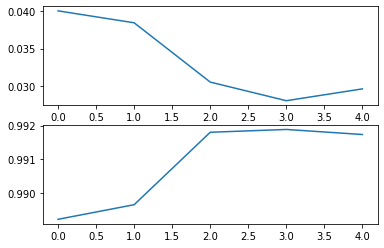

In [0]:
f, (a,b) = plt.subplots(2,1)
a.plot(m1.history['loss'])
b.plot(m1.history['acc'])

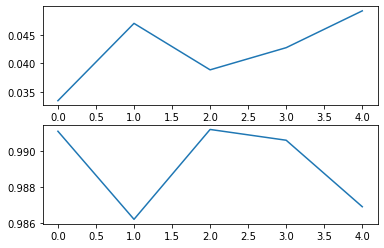

In [0]:
f1, (a1,b1) = plt.subplots(2,1)
a1.plot(m1.history['val_loss'])
b1.plot(m1.history['val_acc'])